### <p style="text-align: right;"> &#9989; Andrew Koren</p>

# PHY480 Homework 4

This homework contains exercises on

- conjugate gradient for linear systems,
- sampling univariate probability distributions,
- central limit theorem.

**There are 7 problems with the total of 41 points.**

**The deadline for the homework is Monday, March 31, 2025, 6:00 pm.**



In [73]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


## Conjugate gradient


**Problem 1 (10 points).** Implement the conjugate gradient method for solving $A\vec{x}=\vec{b}$. Test it by comparing to NumPy methods for solving linear systems or your own implementations of the methods that we discussed previously. (Remember that the conjugate gradient requires a symmetric positive-definite matrix.)


In [74]:
# solve a linear system Ax=b with the conjugate gradient algorithm,
# relative and absolute tolerances are interpreted as in SciPy
# Input:
# A -- symmetric positive-definite n*n matrix,
# b -- r.h.s. vector of size n,
# x0 -- initial guess vector of size n
# rtol, atol -- relative and absolute tolerance, for the loop condition:
#               repeat while |r| > max( rtol*|b|, atol ),
# max_iter -- maximum number of iterations.
# Output: comma separated list of the following 
# status -- =0 on success, =1 if exceeded the maximum number of iterations,
# x -- solution vector,
# number of iterations,
# list of all intermediate x values visited by the algorithm.
def solve_CG( A, b, x0, rtol=1e-5, atol=0, max_iter=5000 ):

    # dimensionality
    n = len( x0 )
    
    # r.h.s. norm for comparisons
    bnorm = np.linalg.norm( b )

    # initial residual
    r = A.dot(x0) - b

    # initial direction
    p = -r.copy()
    # starting point
    x = x0.copy()

    r2 = r@r
    xlist = [x.copy()]

    for k in range(max_iter):
        Ap = A @ p
        alpha = r2 / np.dot(p, Ap)
        x = x + alpha * p
        r = r + alpha * Ap  # Flipping the residual update
        r2new = np.dot(r, r)
        
        xlist.append(x.copy())
        
        if np.linalg.norm(r) <= max(rtol * bnorm, atol):
            return 0, x, k + 1, xlist
        
        beta = r2new / r2
        p = -r + beta * p  # Flipping p explicitly
        r2 = r2new
    
    return 1, x, max_iter, xlist

**Problem 2 (4 points).** Check the NumPy documentation on how to read matrices (defined as two-dimensional Numpy arrays) from `.npy` files. Once you can read a matrix from file, write a function that can calculate direct or staggered sum of all elements, defined correspondingly as

$$
\text{direct}=\sum_{i=0}^{n-1}\sum_{j=0}^{n-1}A_{ij},\,\,\,\,\,\,\,
\text{staggered}=\sum_{i=0}^{n-1}\sum_{j=0}^{n-1}(-1)^{i+j}A_{ij},
$$
where $n$ is the matrix dimension. (The sum bounds follow the 0-based counting convention of Python.)

Read in the three matrices provided in the files `A1.npy`, `A2.npy` and `A3.npy` and check that you are getting (close to, up to the round-off errors) the following values for the sums:

- A1: `25.950316988423985`,`49.17039341584824`,
- A2: `513.369735702169`,`453.27450572307526`,
- A3: `36060.807011517405`,`32718.368804757476`.

This is a quick check that you are able to correctly read the matrices from files on your platform.



In [75]:
def staggered_sum(A):
    return np.sum(A * np.fromfunction(lambda i, j: (-1)**(i+j), A.shape))

In [76]:
# YOUR CODE HERE
A1 = np.load('A1.npy')
A2 = np.load('A2.npy')
A3 = np.load('A3.npy')


print(np.sum(A1), staggered_sum(A1))
print(np.sum(A2), staggered_sum(A2))
print(np.sum(A3), staggered_sum(A3))

25.95031698842397 49.17039341584825
513.3697357021688 453.27450572307464
36060.80701151771 32718.368804757454


**Problem 3 (6 points).** Solve the linear system

$$
Ax = b
$$

for the three matrices $A$ that you read from the provided files. For the right-hand-side vector use $b=[1\,1\,\dots1]^T$ of the matching dimension. Use $x_0=[0\,0\,\dots0]^T$ as a starting guess.

Demonstrate that your solution is correct by comparing with the solution from a NumPy or SciPy solver. Print out how many iterations it took for your version of the conjugate gradient to converge to the solution.


In [77]:
# YOUR CODE HERE
success, x, i, x_list = solve_CG(A1, np.ones(len(A1)), x0 = np.zeros(len(A1)))
assert success == 0
x_np = np.linalg.inv(A1)@np.ones(len(A1))
print(np.max(abs(x-x_np))) # max error

success, x, i, x_list = solve_CG(A2, np.ones(len(A2)), x0 = np.zeros(len(A2)))
assert success == 0
x_np = np.linalg.inv(A2)@np.ones(len(A2))
print(np.max(abs(x-x_np))) # max error

success, x, i, x_list = solve_CG(A3, np.ones(len(A3)), x0 = np.zeros(len(A3)))
assert success == 0
x_np = np.linalg.inv(A3)@np.ones(len(A3))
print(np.max(abs(x-x_np))) # max error


1.5543122344752192e-15
1.1499247128510248e-05
1.3476916509227999e-06


## Probability distributions and the central limit theorem


**Problem 4 (4 points).** Implement a function that generates random numbers from the distribution

$$
P(x)=4-2x,\,\,\,\,\,x\in[1,2].
$$


In [78]:
def dist(u): #inverse cdf
    return 2 - np.sqrt(1 - u )

**Problem 5 (5 points).** Generate $n$ random numbers from the distribution discussed in the previous problem. Compute the mean and the variance and compare with the exact results. Try different $n=100$, $100000$, etc.


In [79]:
import sympy as sp
x = sp.symbols('x')
true_mean = sp.integrate(x*(4-2*x), (x, 1, 2))
true_var = sp.integrate((x-true_mean)**2*(4-2*x), (x, 1, 2))

In [80]:
# set the seed for reproducibility
np.random.seed(1)

# list with sample sizes
n_list = [10,100,1000,10000,100000,1000000]

for n in n_list:
    n_rand = dist(np.random.rand(n))
    stat_mean = n_rand.mean()
    stat_var = n_rand.var()
    
    print(f'n = {n}')
    print(f'{true_mean}-{stat_mean:.4f} = {true_mean-stat_mean:.4f}')
    print(f'{true_var}-{stat_var:.4f} = {true_var-stat_var:.4f}')

n = 10
4/3-1.1829 = 0.1504
1/18-0.0177 = 0.0378
n = 100
4/3-1.3500 = -0.0167
1/18-0.0605 = -0.0050
n = 1000
4/3-1.3345 = -0.0012
1/18-0.0545 = 0.0010
n = 10000
4/3-1.3314 = 0.0019
1/18-0.0545 = 0.0010
n = 100000
4/3-1.3333 = 0.0000
1/18-0.0559 = -0.0003
n = 1000000
4/3-1.3332 = 0.0001
1/18-0.0555 = 0.0001


**Problem 6 (6 points).** Test the central limit theorem by using the distribution from the previous two problems  in the following way. Generate a sequence of random numbers from that distribution of length $n$. Construct a new sequence by taking the average of each $n_{sum}$ random numbers from the original sequence. Let us denote that average $\bar x$. Shift and rescale $\bar x$ as

$$
y \equiv \sqrt{n_{sum}}\,\frac{\bar x - \mu}{\sigma},
$$

where $\mu$ and $\sigma$ are the mean and standard deviation of the distribution from the previous problem. The $y$ sequence has then correspondingly $n/n_{sum}$ elements. Make a histrogram for the $y$ sequence and compare it with the Gaussian distribution ${\cal N}(0,1)$. Try various values of $n_{sum}$ from 1 to 20 (or more, if needed) to understand how the convergence to the limit happens. For a nicer looking result try a sequence where the number of $y$ elements is of the order of $10^5$.



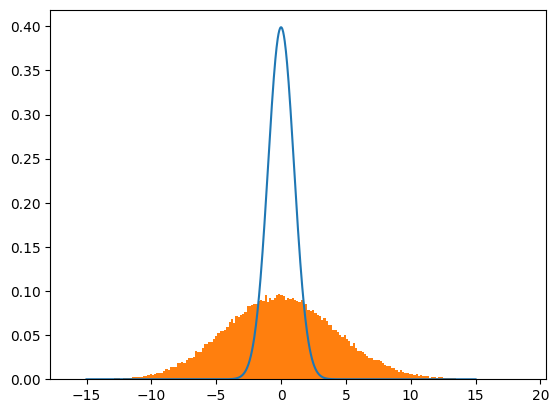

In [82]:

x = np.linspace(-15, 15, 1000)
gaussian = lambda x: 1/(2*np.pi)**(1/2)*np.exp(-x**2/2)
plt.plot(x, gaussian(x))

# YOUR CODE HERE
loop = 1e5
nsum = 30

mu = true_mean
sigma = true_var
y_list = []

for i in range(int(loop)):
    sample_vals = dist(np.random.rand(nsum))
    xbar = sample_vals.mean()
    y = np.sqrt(nsum)*(xbar-mu)/sigma
    y_list.append(y)
    
result = np.array(y_list).astype(float)

plt.hist(result, density=True, bins=200);

**Problem 7 (6 points).** Test the central limit theorem in the same way as in the previous problem for $P(x)=e^{-x}$, $x\in[0,\infty).$


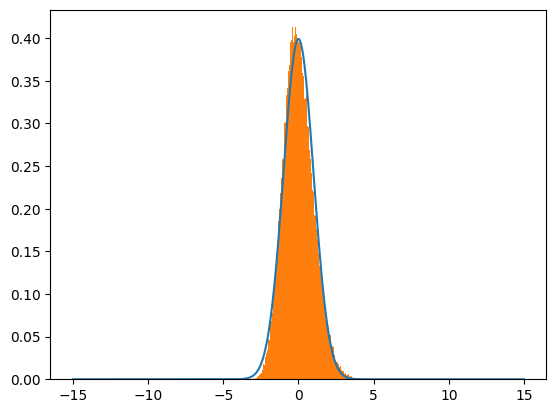

In [83]:
dist2 = lambda u: -np.log(1-u)

plt.plot(x, gaussian(x))

# YOUR CODE HERE
loop = 1e5
nsum = 30

mu = 1
sigma = 1
y_list = []

for i in range(int(loop)):
    sample_vals = dist2(np.random.rand(nsum))
    xbar = sample_vals.mean()
    y = np.sqrt(nsum)*(xbar-mu)/sigma
    y_list.append(y)
    
result = np.array(y_list).astype(float)

plt.hist(result, density=True, bins=200);



&#169; Copyright 2025,  Michigan State University Board of Trustees